In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('orders.csv')
df

,date,vendor_id,chain_id,city_id,spec,successful_orders,fail_orders
0,2019-07-02,40065,7501,23,Суши,54.0,1.0
1,2019-08-27,48058,33226,23,Шаурма,0.0,0.0
2,2019-09-25,35430,26220,25,Пицца,2.0,0.0
3,2019-09-21,56553,38601,23,Шашлыки,1.0,0.0
4,2019-09-21,43919,30984,25,Суши,6.0,0.0
...,...,...,...,...,...,...,...
96113,2019-08-18,44315,31154,24,Суши,2.0,0.0
96114,2019-06-15,17528,11182,25,Пицца,11.0,1.0
96115,2019-08-19,45351,31679,23,Вьетнамская,1.0,0.0
96116,2019-09-26,64209,42525,25,Суши,7.0,0.0


In [3]:
df['city_id'].value_counts()

city_id
23    32995
25    24276
26    21533
24    17314
Name: count, dtype: int64

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.head()

,date,vendor_id,chain_id,city_id,spec,successful_orders,fail_orders
0,2019-07-02,40065,7501,23,Суши,54.0,1.0
1,2019-08-27,48058,33226,23,Шаурма,0.0,0.0
2,2019-09-25,35430,26220,25,Пицца,2.0,0.0
3,2019-09-21,56553,38601,23,Шашлыки,1.0,0.0
4,2019-09-21,43919,30984,25,Суши,6.0,0.0


In [1]:
from deep_translator import GoogleTranslator
to_translate = 'Суши'
translated = GoogleTranslator(source='auto', target='english').translate(to_translate)
translated

'Sushi'

In [9]:
def translate_category(spec):
    return GoogleTranslator(source='auto', target='english').translate(spec)

In [12]:
df['spec'].unique()

array(['Суши', 'Шаурма', 'Пицца', 'Шашлыки', 'Грузинская', 'Бургеры',
       'Русская', 'Мясо', 'Вьетнамская', 'Сэндвичи', 'Обеды',
       'Паназиатская', 'Рыба', 'Пироги', 'Кофе и чай', 'Выпечка',
       'Десерты', 'Китайская', 'Здоровая еда', 'Итальянская', nan,
       'Фастфуд', 'Узбекская', 'Мексиканская', 'Японская', 'Супы',
       'Паста и ризотто', 'Завтраки', 'Хот-доги', 'Хумус', 'Индийская',
       'Корейская', 'Вегетарианское меню', 'Гирос', 'Халяль', 'Хинкали'],
      dtype=object)

In [16]:
df_2000=df.head(2000)
df_2000

,date,vendor_id,chain_id,city_id,spec,successful_orders,fail_orders
0,2019-07-02,40065,7501,23,Суши,54.0,1.0
1,2019-08-27,48058,33226,23,Шаурма,0.0,0.0
2,2019-09-25,35430,26220,25,Пицца,2.0,0.0
3,2019-09-21,56553,38601,23,Шашлыки,1.0,0.0
4,2019-09-21,43919,30984,25,Суши,6.0,0.0
...,...,...,...,...,...,...,...
1995,2019-08-24,63852,42352,23,Пицца,1.0,0.0
1996,2019-08-02,59228,31712,26,Выпечка,1.0,1.0
1997,2019-09-07,11486,6861,25,Суши,8.0,0.0
1998,2019-07-10,24152,16039,23,Пицца,21.0,0.0


In [24]:
df_2000.isnull().sum()

date                  0
vendor_id             0
chain_id              0
city_id               0
spec                 11
successful_orders     0
fail_orders           0
dtype: int64

In [20]:
spec=df_2000['spec'].dropna().unique().tolist()
spec

['Суши',
 'Шаурма',
 'Пицца',
 'Шашлыки',
 'Грузинская',
 'Бургеры',
 'Русская',
 'Мясо',
 'Вьетнамская',
 'Сэндвичи',
 'Обеды',
 'Паназиатская',
 'Рыба',
 'Пироги',
 'Кофе и чай',
 'Выпечка',
 'Десерты',
 'Китайская',
 'Здоровая еда',
 'Итальянская',
 'Фастфуд',
 'Узбекская',
 'Мексиканская',
 'Японская',
 'Супы',
 'Паста и ризотто',
 'Завтраки',
 'Хот-доги',
 'Хумус',
 'Индийская',
 'Корейская',
 'Вегетарианское меню']

In [27]:
df_5=df_2000.head(5)
df_5

,date,vendor_id,chain_id,city_id,spec,successful_orders,fail_orders
0,2019-07-02,40065,7501,23,Sushi,54.0,1.0
1,2019-08-27,48058,33226,23,Shawarma,0.0,0.0
2,2019-09-25,35430,26220,25,Pizza,2.0,0.0
3,2019-09-21,56553,38601,23,Kebabs,1.0,0.0
4,2019-09-21,43919,30984,25,Sushi,6.0,0.0


In [25]:
# Filling the missing values in spec column with 'Random Values'
df_2000['spec'].fillna('Random Values', inplace=True)
df_2000.isnull().sum()

/var/folders/bd/tsbt311j74dd9vr3q6pjs6x80000gn/T/ipykernel_30118/3323717059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000['spec'].fillna('Random Values', inplace=True)


date                 0
vendor_id            0
chain_id             0
city_id              0
spec                 0
successful_orders    0
fail_orders          0
dtype: int64

In [26]:
df_2000['spec'] = df_2000['spec'].apply(translate_category)
#df_2000.loc[:, 'spec'] = df_2000['spec'].apply(translate_category)

/var/folders/bd/tsbt311j74dd9vr3q6pjs6x80000gn/T/ipykernel_30118/3758493751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000['spec'] = df_2000['spec'].apply(translate_category)


In [28]:
df_2000

,date,vendor_id,chain_id,city_id,spec,successful_orders,fail_orders
0,2019-07-02,40065,7501,23,Sushi,54.0,1.0
1,2019-08-27,48058,33226,23,Shawarma,0.0,0.0
2,2019-09-25,35430,26220,25,Pizza,2.0,0.0
3,2019-09-21,56553,38601,23,Kebabs,1.0,0.0
4,2019-09-21,43919,30984,25,Sushi,6.0,0.0
...,...,...,...,...,...,...,...
1995,2019-08-24,63852,42352,23,Pizza,1.0,0.0
1996,2019-08-02,59228,31712,26,Baking,1.0,1.0
1997,2019-09-07,11486,6861,25,Sushi,8.0,0.0
1998,2019-07-10,24152,16039,23,Pizza,21.0,0.0


In [30]:
df_2000.to_csv('translated_orders.csv', index=False)

In [5]:
translated_df = pd.read_csv('translated_orders.csv')
translated_df

,date,vendor_id,chain_id,city_id,spec,successful_orders,fail_orders
0,2019-07-02,40065,7501,23,Sushi,54.0,1.0
1,2019-08-27,48058,33226,23,Shawarma,0.0,0.0
2,2019-09-25,35430,26220,25,Pizza,2.0,0.0
3,2019-09-21,56553,38601,23,Kebabs,1.0,0.0
4,2019-09-21,43919,30984,25,Sushi,6.0,0.0
...,...,...,...,...,...,...,...
1995,2019-08-24,63852,42352,23,Pizza,1.0,0.0
1996,2019-08-02,59228,31712,26,Baking,1.0,1.0
1997,2019-09-07,11486,6861,25,Sushi,8.0,0.0
1998,2019-07-10,24152,16039,23,Pizza,21.0,0.0


In [6]:
# Mapping the spec with id number
spec_id = {spec: id for id, spec in enumerate(translated_df['spec'].unique())}
spec_id

{'Sushi': 0,
 'Shawarma': 1,
 'Pizza': 2,
 'Kebabs': 3,
 'Georgian': 4,
 'Burgers': 5,
 'Russian': 6,
 'Meat': 7,
 'Vietnamese': 8,
 'Sandwiches': 9,
 'Lunches': 10,
 'Pan-Asian': 11,
 'Fish': 12,
 'Pies': 13,
 'Coffee and tea': 14,
 'Baking': 15,
 'Dessert': 16,
 'Chinese': 17,
 'Healthly food': 18,
 'Italian': 19,
 'Random Values': 20,
 'Fast food': 21,
 'Shashlik': 22,
 'Uzbek': 23,
 'Mexican': 24,
 'Japanese': 25,
 'Soups': 26,
 'Pasta and Risotto': 27,
 'Breakfast': 28,
 'Hot dogs': 29,
 'Breakfasts': 30,
 'Hummus': 31,
 'Indian': 32,
 'Korean': 33,
 'Vegetarian menu': 34,
 'Pasta and risotto': 35}

In [7]:
translated_df['spec_id'] = translated_df['spec'].map(spec_id)
translated_df

,date,vendor_id,chain_id,city_id,spec,successful_orders,fail_orders,spec_id
0,2019-07-02,40065,7501,23,Sushi,54.0,1.0,0
1,2019-08-27,48058,33226,23,Shawarma,0.0,0.0,1
2,2019-09-25,35430,26220,25,Pizza,2.0,0.0,2
3,2019-09-21,56553,38601,23,Kebabs,1.0,0.0,3
4,2019-09-21,43919,30984,25,Sushi,6.0,0.0,0
...,...,...,...,...,...,...,...,...
1995,2019-08-24,63852,42352,23,Pizza,1.0,0.0,2
1996,2019-08-02,59228,31712,26,Baking,1.0,1.0,15
1997,2019-09-07,11486,6861,25,Sushi,8.0,0.0,0
1998,2019-07-10,24152,16039,23,Pizza,21.0,0.0,2


In [13]:
translated_df['spec_id'].value_counts()

spec_id
0     465
2     279
5     271
3     129
6     127
1     117
7      91
21     81
9      80
4      56
19     34
25     30
15     28
12     22
10     21
23     20
16     18
17     16
8      14
22     13
26     13
20     11
18     10
13     10
14      8
32      8
28      6
11      5
35      4
33      3
24      2
29      2
30      2
31      2
27      1
34      1
Name: count, dtype: int64

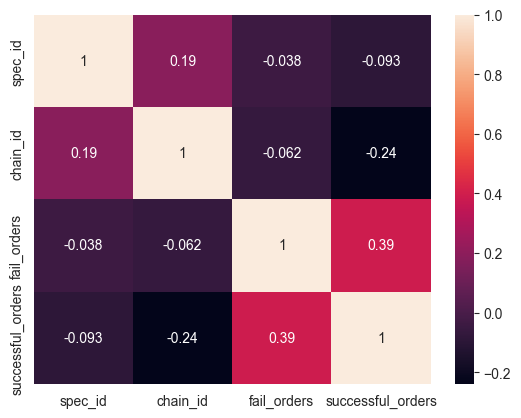

In [15]:
# Doing a Coorelation Matrix between Available Room with Net Profit
sns.heatmap(translated_df[['spec_id','chain_id','fail_orders','successful_orders']].corr(),annot=True)
plt.show()

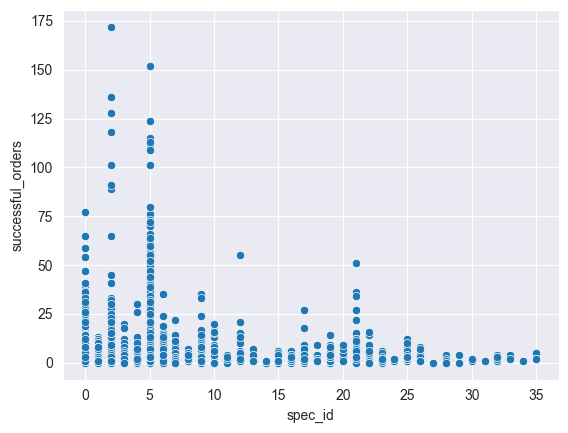

<Figure size 4000x5000 with 0 Axes>

In [24]:
sns.scatterplot(x='spec_id',y='successful_orders',data=translated_df)
plt.figure(figsize=(40,50))
plt.show()

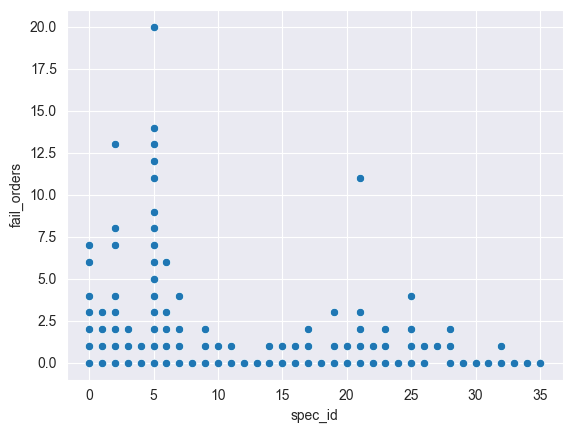

In [20]:
sns.scatterplot(x='spec_id',y='fail_orders',data=translated_df)
plt.show()

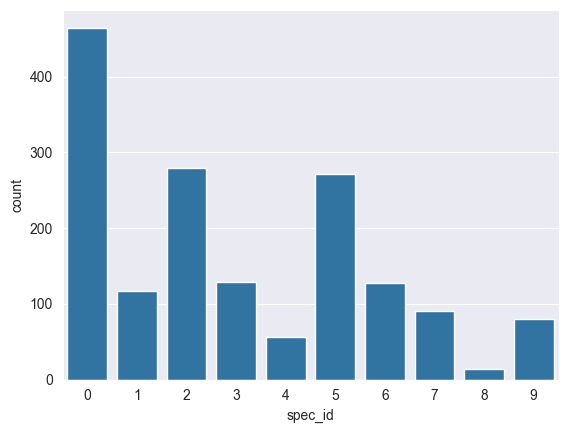

<Figure size 10000x10000 with 0 Axes>

In [30]:
sns.countplot(x='spec_id',data=translated_df[translated_df['spec_id']<10])
plt.figure(figsize=(100,100))
plt.show()